In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
#import tensorflow_datasets as tfds

In [2]:
! pip install opencv-python==4.6.0.66

In [2]:
%cd "D:\DL gesty"
train = pd.read_csv("sign_mnist_train.csv")
train.head()

d:\DL gesty


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
test = pd.read_csv("sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
train['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [5]:
#sprawdzmy braki
print("train ",sum(train.isna().sum()))
print("test ",sum(test.isna().sum()))

train  0
test  0


In [6]:
Y_train = train.iloc[:,0]
X_train = train.iloc[:,1:]
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

Y_test = test.iloc[:,0]
X_test = test.iloc[:,1:]
X_test = X_test.to_numpy()
Y_test= Y_test.to_numpy()

In [7]:
X_train[6,].shape

(784,)

In [8]:
#zmiana kształtu zbioru
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [9]:
#zmiana ksztaltu naszego zbioru Y
Y_train = Y_train.reshape(-1,1)
Y_train = OneHotEncoder(sparse = False).fit_transform(Y_train)

Y_test = Y_test.reshape(-1,1)
Y_test = OneHotEncoder(sparse = False).fit_transform(Y_test)

In [10]:
from PIL import Image
#To see the image
img = Image.fromarray(X_train[8, :].reshape(28, 28).astype('uint8'))
img.show()

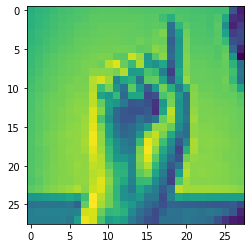

In [11]:
#zobrazujmy sobie obraz
plt.imshow(X_train[8,])
plt.show()

In [12]:
#nasze klasy sa zbalansowane
for i in range(0, 24):
    print("Klasa ", i, sum(Y_train[:,i]))

Klasa  0 1126.0
Klasa  1 1010.0
Klasa  2 1144.0
Klasa  3 1196.0
Klasa  4 957.0
Klasa  5 1204.0
Klasa  6 1090.0
Klasa  7 1013.0
Klasa  8 1162.0
Klasa  9 1114.0
Klasa  10 1241.0
Klasa  11 1055.0
Klasa  12 1151.0
Klasa  13 1196.0
Klasa  14 1088.0
Klasa  15 1279.0
Klasa  16 1294.0
Klasa  17 1199.0
Klasa  18 1186.0
Klasa  19 1161.0
Klasa  20 1082.0
Klasa  21 1225.0
Klasa  22 1164.0
Klasa  23 1118.0


In [13]:
#normalizacja
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
X_train[6,].shape

(28, 28)

In [15]:
# Architektura z wykorzystaniem modelu sekwencyjnego

# from keras.models import Sequential
# from keras.layers import Flatten, Dense

# model = Sequential([
#     Dense (200, activation = 'relu', input_shape=(28, 28, 3)),Flatten(),
#     Dense (150, activation = 'relu'), Dense (10, activation = 'softmax')
])

In [24]:
# Architektura z wykorzystaniem funkcjonalnego API

from keras.layers import Input, Flatten, Dense 
from keras.models import Model

input_layer=Input (shape=(28,28, 3))                        #Warstwa Input jest punktem wejścia do sieci. Informujemy sieć, że oczekiwanym formatem każdego elementu danych jest krotka.

x = Flatten() (input_layer)                                 #Za pomocą warstwy Flatten, spłaszczamy wejście do postaci wektora. W rezultacie otrzy mujemy wektor o długości 3072 (= 32x32×3). 
# x = (input_layer)  
x = Dense (units=200, activation = 'relu')(x) 
x = Dense (units=150, activation = 'relu')(x)

output_layer =Dense (units=10, activation = 'softmax')(x)   #Dense zawiera określoną liczbę jednostek, które są gęsto powiązane z warstwą poprzednią. Oznacza to, że każda jednostka w warstwie jest połączona 
                                                            # z każdą jednostką w warstwie poprzedniej za pośrednictwem pojedynczego połączenia, które przekazuje wagę (może ona być dodatnia bądź ujemna). 
model1 = Model (input_layer, output_layer)                  # Wyjście z określonej jednostki jest ważoną sumą danych wejściowych otrzymanych przez nią z warstwy poprzedniej.

W powyższym przykładzie używamy trzech różnych rodzajów warstw: Input, Flatten i Dense.

* Warstwa **Input** jest punktem wejścia do sieci. Informujemy sieć, że oczekiwanym formatem każdego elementu danych jest krotka. 
* Nie określamy rozmiaru partii. Nie jest to konieczne, ponieważ do warstwy Input możemy jednocześnie przekazać dowolną liczbę obrazów.
* Nie musimy jawnie określać rozmiaru paczki w definicji warstwy Input.

* Za pomocą warstwy **Flatten, spłaszczamy wejście do postaci wektora**. W rezultacie otrzy mujemy wektor o długości 3072 (= 32x32×3). 
* Powodem spłaszczania jest wymaganie kolejnej warstwy - Dense - której wejście nie jest wielowymiarową tablicą, lecz jest płaskie. Inne rodzaje warstw wymagają wejścia w postaci wielowymiarowych tablic. 
* Aby zatem zrozumieć, kiedy jest niezbędne skorzystanie z warstwy typu Flatten, trzeba mieć świadomość wymaganego kształtu danych wejściowych i wyjściowych każdego rodzaju warstwy.

* **Dense** to bodaj najbardziej podstawowy typ warstwy w każdej sieci neuronowej. 
* Zawiera określoną liczbę jednostek, które są **gęsto powiązane z warstwą poprzednią**. 
Oznacza to, że każda jednostka w warstwie jest połączona z każdą jednostką w warstwie poprzedniej za pośrednictwem pojedynczego połączenia, które przekazuje wagę 
(może ona być dodatnia bądź ujemna). 
* Wyjście z określonej jednostki jest **ważoną sumą danych wejściowych** otrzymanych przez nią z warstwy poprzedniej.

Biblioteka Keras umożliwia również zdefiniowanie funkcji aktywacji w oddzielnej warstwie:

In [25]:
x = Dense (units=200, activation = 'relu')(x)

W naszym przykładzie przekazujemy dane wejściowe przez **dwie gęste warstwy ukryte** - pierwsza jest złożona z 200 jednostek, a druga składa się ze 150. Obie wykorzystują **funkcje aktywacji ReLU**

Ostatnim krokiem jest zdefiniowanie samego modelu z wykorzystaniem klasy Model. W Keras model jest zdefiniowany przez warstwy wejściowe i wyjściowe. W naszym przypadku mamy jedną warstwę wejściową, którą zdefiniowaliśmy wcześniej, a warstwą wyjściową jest ostatnia warstwa Dense złożona z 10 jednostek. Możliwe jest również zdefiniowanie modeli z wieloma warstwami wejściowymi i wyjściowymi. 

W naszym przykładzie, zgodnie z wymaganiami, **kształt warstwy Input** odpowiada kształtowi **x_train**, a kształt **warstwy wyjściowej Dense** odpowiada kształtowi **y_train**. Aby to zilustrować, możemy skorzystać z metody:

In [26]:
model1.summary ()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 2352)              0         
                                                                 
 dense_8 (Dense)             (None, 200)               470600    
                                                                 
 dense_9 (Dense)             (None, 150)               30150     
                                                                 
 dense_10 (Dense)            (None, 10)                1510      
                                                                 
Total params: 502,260
Trainable params: 502,260
Non-trainable params: 0
_________________________________________________________________


Za jej pomocą można zobaczyć kształt sieci w każdej warstwie (rysunek powyzej)

* biblioteka Keras wykorzystuje w roli znacznika None, aby pokazać, że nie zna jeszcze liczby obserwacji, które będą przekazane do sieci. 
* W rzeczywistości to nie jest konieczne. Równie łatwo moglibyśmy przekazać przez sieć jedną obserwację, jak i 1 000 naraz. To dlatego, że **operacje tensorowe** są wykonywane dla wszystkich obserwacji **jednocześnie** przy użyciu algebry liniowej tym zajmuje się **backendTensorFlow**. 
* Jest to również powód, dla którego można uzyskać wzrost wydajności podczas szkolenia głębokich sieci neuronowych na układach **GPU** zamiast **CPU**: układy GPU są zoptymalizowane pod kątem **mnożenia dużych tensorów**, ponieważ tego rodzaju obliczenia są też niezbędne do wykonywania skomplikowanych operacji graficznych.
* Metoda summary zwraca również **liczbę parametrów (wag)**, które zostaną przeszkolone w każdej warstwie. Wynik metody summary pokazuje czy są jakieś warstwy, które zawierają olbrzymią liczbę wag. Jeśli tak jest, należy rozważyć zmniejszenie liczby jednostek w warstwie, powinno przyspieszyć szkolenie.

## Kompilacja modelu
W tym kroku skompilujemy model z **optymalizatorem i funkcją strat**:

In [27]:
from keras.optimizers import Adam

opt =Adam(learning_rate=0.0005)
model1.compile(loss=' categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Funkcja strat jest wykorzystywana przez sieć neuronową do porównywania prognozowanego wy ścia z bazową prawdą. Funkcja zwraca pojedynczą liczbę dla każdej obserwacji. Im większa jest ta liczba, tym gorsza dla tej obserwacji wydajność sieci.

Biblioteka Keras dostarcza wielu wbudowanych funkcji strat do wyboru. Można również tworzy własne funkcje strat. Trzy najczęściej stosowane funkcje strat to błąd średniokwadratowy, krzy żowa entropia skategoryzowana i krzyżowa entropia binarna. Jest bardzo ważne, aby zrozumie kiedy należy korzystać z każdej z nich.

Jeśli sieć neuronowa jest zaprojektowana w celu rozwiązania problemu regresji (tzn. wyjście jes ciągłe), to możemy użyć jako funkcji strat błędu średniokwadratowego. Jest to średnia z kwadrat różnicy pomiędzy bazową prawdą y; a prognozowaną wartością p; każdej jednostki wyjściowe Średnia jest wyliczana dla wszystkich n jednostek wyjściowych:

## Szkolenie modelu
Dotychczas nie pokazaliśmy modelowi żadnych danych, lecz jedynie skonfigurowaliśmy architek turę i skompilowaliśmy model z funkcją strat i optymalizatorem.
Aby wyszkolić model, wystarczy wywołać metodę fit:

In [28]:
model1.fit(X_train ,    # Surowe dane obrazu.
    Y_train ,          # Etykiety klasy w kodzie 1 z n.
    batch_size = 32,   # batch_size określa liczbę obserwacji, które zostaną przekazane do sieci na każdym etapie szkolenia
    epochs = 10,       # epochs określa, ile razy sieci zostaną pokazane pełne dane treningowe.
    shuffle= True      # Jeśli shuffle = True, partie będą pobierane losowo, bez wymiany z danych treningowych na każ dym etapie szkolenia.
)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_1" (type Functional).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 2352, but received input with shape (None, 784)
    
    Call arguments received by layer "model_1" (type Functional):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
      • training=True
      • mask=None


Wywołanie metody **fit** spowoduje rozpoczęcie szkolenia głębokiej sieci neuronowej do zadania przewidywania kategorii obrazu z zestawu danych.

Proces szkolenia działa w następujący sposób: najpierw wagi sieci są inicjalizowane niewielkimi losowymi wartościami, następnie sieć wykonuje szereg etapów szkoleniowych.

Na każdym etapie szkolenia przez sieć przekazywana jest jedna partia zdjęć, a błędy są **propagowane wstecz** w celu **aktualizacji wag**. Wartość **batch_size** określa liczbę obrazów w każdej partii etapu szkolenia. Im większa wielkość partii, tym bardziej stabilne obliczenia gradientu, ale wolniej szy przebieg każdego etapu szkolenia. Użycie całego zestawu danych do obliczenia gradientu na każdym etapie szkolenia byłoby zbyt czasochłonne i wymagałoby intensywnych obliczeń, dlatego na ogół stosuje się partie o wielkości od 32 do 256. Obecnie zalecaną praktyką jest również zwiększanie wielkości partii w miarę postępu szkolenia*.

Proces szkolenia trwa dopóty, dopóki wszystkie obserwacje w zbiorze nie zostaną zaobserwowane co najmniej raz. Na tym kończy się pierwsza **epoka**. Dane są następnie przekazywane przez sieć partiami ponownie, w ramach drugiej epoki. Proces ten powtarza się, aż zostanie zrealizowana określona liczba epok.

Podczas szkolenia Keras wyświetla postęp procedury, co zostało pokazane na rysunku 2.7. Możemy zauważyć, że szkoleniowy zestaw danych składający się z 50 000 obserwacji pokazano sieci 10 razy (to znaczy przeprowadzono 10 epok), z szybkością wynoszącą w przybliżeniu 160 mikrosekund na obserwację. Wartość skategoryzowanej entropii krzyżowej waha się w zakresie od 1842 do 1357, co skutkuje zwiększeniem dokładności z 33,5% po pierwszej epoce do 51,9% po epoce dziesiątej.

### Ocena modelu

 model dla zestawu szkoleniowego osiąga dokładność 51,9%. Zobaczmy jednak, jaka jest wydajność modelu w odniesieniu do danych, których nigdy nie widział.

Aby odpowiedzieć na to pytanie, możemy użyć dostępnej w bibliotece Keras metody evaluate:

In [34]:
model1.evaluate (X_test, Y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Za pomocą poniższego kodu możemy przeglądać niektóre obrazy wraz z ich etykietami i prognozam Zgodnie z oczekiwaniami mniej więcej połowa prognoz jest prawidłowa:

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10

indices = np.random.choice (range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))

fig.subplots_adjust (hspace=0.4, wspace=0.4)

for i, idx in enumerate (indices):
    img = X_test [idx] 
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text (0.5, -0.35, 'progn. + str(preds_single [idx]), fontsize=10 , ha='center', transform-ax.transAxes) 
    ax.text(0.5, -0.7, 'rzecz.= ' + str(actual_single [idx]), fontsize=10, ha='center', transform=ax. transAxes)

ax.imshow(img)

Losowy wybór prognoz modelu wraz z prawidłowymi etykietami zaprezentowano na rysunku
* Powstała głęboką sieć neuronową przy użyciu biblioteki Keras i przeprowadzono prognoz dla nowych danych. Wiele głównych koncepcji dotyczących tej sieci (takich jak funkcje strat i funkcje aktywacji czy też kształty warstw) nadal będzie niezwykle ważnych. 